In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='left')
combined_data = combined_data[["Mouse ID", "Timepoint", "Tumor Volume (mm3)","Metastatic Sites","Drug Regimen", "Sex", "Age_months", "Weight (g)"]]

output_file = 'combined_data.csv'
combined_data.to_csv(output_file)

# Display the data table for preview
combined_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16
...,...,...,...,...,...,...,...,...
1888,z969,25,63.145652,2,Naftisol,Male,9,30
1889,z969,30,65.841013,3,Naftisol,Male,9,30
1890,z969,35,69.176246,4,Naftisol,Male,9,30
1891,z969,40,70.314904,4,Naftisol,Male,9,30


In [34]:
# to display results with a 100% match as on the exercise, I used an additional code and created a new variable
# to remove duplicates, and display information for only 'b128', 'f932', 'g107', 'a457', 'c819' Moise IDs.
# since we only needed here only one line for each Mouse ID, I did not request unique Timepoints in this code

# List of specific Mouse IDs
mouse_ids = ['b128', 'f932', 'g107', 'a457', 'c819']

# Initialize an empty DataFrame to store the results
result_df = pd.DataFrame()

# Loop through each Mouse ID, filter, drop duplicates, and append the first 5 rows using 'concat' function
for mouse_id in mouse_ids:
    filtered_data = combined_data[combined_data['Mouse ID'] == mouse_id]
    unique_filtered_data = filtered_data.drop_duplicates(subset=['Mouse ID'])
    result_df = pd.concat([result_df, unique_filtered_data], ignore_index=True)

# Display the combined result
print(result_df)


  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25  


In [35]:
# Checking the number of mice.
unique_mouse_ids = combined_data['Mouse ID'].nunique()

print(f'Number of unique mice: {unique_mouse_ids}')

Number of unique mice: 249


In [36]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Find duplicate rows based on 'Mouse ID' and 'Timepoint'
duplicate_rows = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Extract unique 'Mouse ID' values from the duplicate rows
duplicate_mouse_ids = duplicate_rows['Mouse ID'].unique()

print(f"array ( {duplicate_mouse_ids})")
print(f"dtype= {duplicate_mouse_ids.dtype}")

array ( ['g989'])
dtype= object


In [37]:

# Display the duplicate rows for both Mouse ID and Timepoint
print(duplicate_rows)


    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
908     g989          0           45.000000                 0     Propriva   
909     g989          0           45.000000                 0     Propriva   
910     g989          5           48.786801                 0     Propriva   
911     g989          5           47.570392                 0     Propriva   
912     g989         10           51.745156                 0     Propriva   
913     g989         10           49.880528                 0     Propriva   
914     g989         15           51.325852                 1     Propriva   
915     g989         15           53.442020                 0     Propriva   
916     g989         20           55.326122                 1     Propriva   
917     g989         20           54.657650                 1     Propriva   

        Sex  Age_months  Weight (g)  
908  Female          21          26  
909  Female          21          26  
910  Female          21    

In [38]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# Remove all rows for Mouse ID g989 as the entries for this ID have duplicate data 
# so the task was to remove all rows for this mouse as we're not sure in accuracy of such entries
# such small number will not interfere with out results

clean_combined_data = combined_data[combined_data['Mouse ID'] != 'g989']

print(clean_combined_data.head(5))

  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     k403          0           45.000000                 0     Ramicane   
1     k403          5           38.825898                 0     Ramicane   
2     k403         10           35.014271                 1     Ramicane   
3     k403         15           34.223992                 1     Ramicane   
4     k403         20           32.997729                 1     Ramicane   

    Sex  Age_months  Weight (g)  
0  Male          21          16  
1  Male          21          16  
2  Male          21          16  
3  Male          21          16  
4  Male          21          16  


In [39]:
# Save the cleaned DataFrame on my local PC just for faster debugging if needed
output_file = 'clean_combined_data.csv'
clean_combined_data.to_csv(output_file)

In [40]:
# Creating a new variable to filter out only the results for only 'b128', 'f932', 'g107', 'a457', 'c819' Moise IDs to match output on the assignment

# List of specific Mouse IDs
mouse_ids = ['b128', 'f932', 'g107', 'a457', 'c819']

# Initialize an empty DataFrame to store the results
filtered_dfs = []

# Loop through each Mouse ID, filter the data, and append the first 5 rows to filtered_dfs
for mouse_id in mouse_ids:
    filtered_df = clean_combined_data[(clean_combined_data['Mouse ID'] == mouse_id) & (clean_combined_data['Timepoint'] == 0)].head(5)
    filtered_dfs.append(filtered_df)

# Concatenate all filtered DataFrames into one DataFrame
clean_df = pd.concat(filtered_dfs, ignore_index=True)

# Display the combined result
print(clean_df)

  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25  


In [41]:
# Checking the number of mice in the clean DataFrame.

unique_updated_mouse_ids = clean_combined_data['Mouse ID'].nunique()

print(f'{unique_updated_mouse_ids}')

# since I used 'nunique()' function to count the number of mice in the clean data above, it only counts unrepeated Mouse ID, so the duplicate lines were not counted more than once.
#When used Pivot tables on combined_data and clean_data, they both showed 249 unique mice ID.

248


## Summary Statistics

In [42]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Group by 'Drug Regimen' and calculate summary statistics for 'Tumor Volume (mm3)'
# agg function was more suitable here comparing to describe as we could choose all statistical information we needed and exclude those we did not
summary_df = clean_combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([
    'mean', 'median', 'var', 'std', 'sem'
])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary_df = summary_df.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Deviation',
    'sem': 'Tumor Volume Std.Err.'
})
# Assemble the resulting series into a single summary DataFrame.
print(summary_df)


              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Deviation  Tumor Vo

In [43]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

advanced_df = clean_combined_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':
    ['mean', 'median', 'var', 'std', 'sem']
})
summary_df = summary_df.rename(columns={
    'mean': 'mean',
    'median': 'median',
    'var': 'var',
    'std': 'std',
    'sem': 'sem'
})
print(advanced_df)

             Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

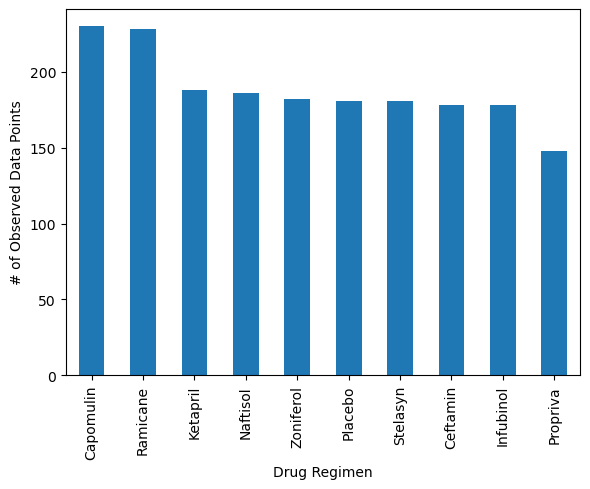

In [44]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Counting the number of raws for each group
drug_counts = clean_combined_data.groupby('Drug Regimen').size()

# Sorting drug_counts in descending order to match the output on the task
drug_counts = drug_counts.sort_values(ascending=False)

# Plotting the bar chart
drug_counts.plot(kind='bar', figsize=(6, 5))

# Adding labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Data Points')


# Display the plot
plt.tight_layout()
plt.show()


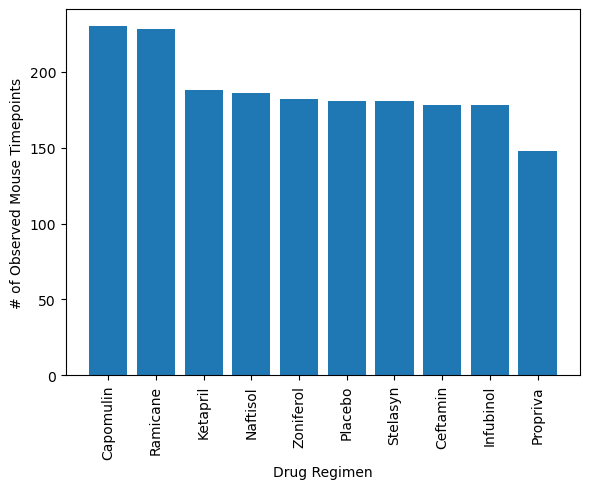

In [45]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

import pandas as pd
import matplotlib.pyplot as plt

# Assuming clean_combined_data is your DataFrame containing the data
# Group by 'Drug Regimen' and count the number of rows (Mouse ID/Timepoints) for each group
drug_counts = clean_combined_data.groupby('Drug Regimen').size()

# Sort drug_counts in descending order
drug_counts_sorted = drug_counts.sort_values(ascending=False)

# Plotting the bar chart using Matplotlib
fig, ax = plt.subplots(figsize=(6, 5))

# Create the bar plot with descending order
bars = ax.bar(drug_counts_sorted.index, drug_counts_sorted.values)

# Adding labels and title
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('# of Observed Mouse Timepoints')

# Set y-axis ticks
ax.set_yticks([0, 50, 100, 150, 200])
# Rotate x-axis labels vertically
ax.tick_params(axis='x', rotation=90) 

# Show plot
plt.tight_layout()
plt.show()


In [46]:
print(clean_combined_data.columns)

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')


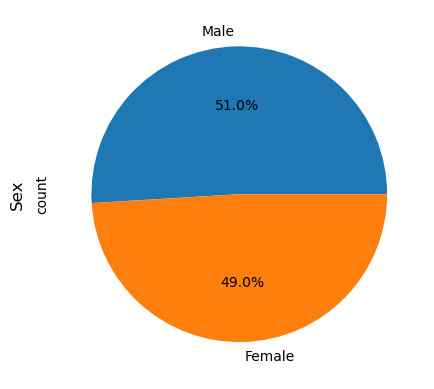

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Groupping by 'Sex' and counting the number of entries for each group
mouse_sex_counts = clean_combined_data['Sex'].value_counts()

# Defining the function to format percentages to round the calculations but to display it with one decimal as shown on the task
def format_pct(pct):
    total = sum(mouse_sex_counts)
    val = int(round(pct * total / 100.0))
    return '{:.1f}%'.format(val / total * 100)

# Plotting the pie chart using Pandas: blue for males, orange for females
colors = ['#1f77b4', '#ff7f0e']
labels = ['Male', 'Female']
pie_plot = mouse_sex_counts.plot.pie(colors=colors, labels=labels, autopct=format_pct, startangle=360)

# Add a note on the left
pie_plot.text(-1.5, 0, 'Sex', fontsize=12, ha='center', va='center', rotation='vertical')

# Ensuring the plot is a circle
pie_plot.set_aspect('equal')

# Displaying the plot
plt.show()

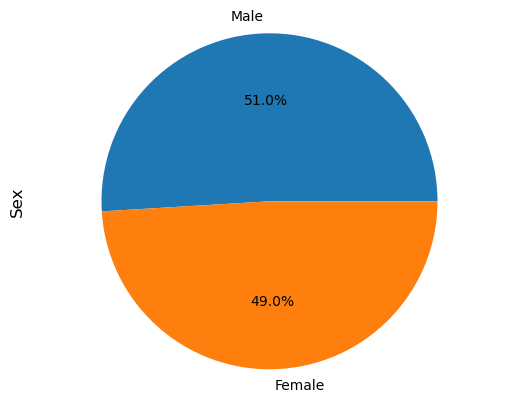

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Groupping by 'Sex' and counting the number of entries for each group
sex_counts = clean_combined_data['Sex'].value_counts()

# Creating a pie plot
fig, ax = plt.subplots()

# Defining the function to format percentages to round the calculations but to display it with one decimal as shown on the task
def format_pct(pct):
    total = sum(sex_counts)
    val = int(round(pct*total/100.0))
    return '{:.1f}%'.format(val/total*100)

# Plotting the pie chart similar to displayed on the task: blue for males, orange for females
colors = ['#1f77b4', '#ff7f0e']  
labels = ['Male', 'Female']
ax.pie(sex_counts, labels=labels, colors=colors, autopct='%.1f%%', startangle=360)

# Add a note on the left
plt.text(-1.5, 0, 'Sex', fontsize=12, ha='center', va='center', rotation='vertical')

# Ensuring the plot is a circle
ax.axis('equal')

# Displaying the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [49]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Create a list of treatment regimens we're interested
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter data for the specified treatment regimens
filtered_data = clean_combined_data[clean_combined_data['Drug Regimen'].isin(treatment_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(max_timepoints, clean_combined_data, on=['Mouse ID', 'Timepoint'], how='left')

# Display the final tumor volume for each mouse across the specified treatment regimens
print(final_tumor_volume[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']])

output_file = 'final_tumor_volume.csv'
final_tumor_volume.to_csv(output_file)


   Mouse ID Drug Regimen  Timepoint  Tumor Volume (mm3)
0      a203    Infubinol         45           67.973419
1      a251    Infubinol         45           65.525743
2      a275     Ceftamin         45           62.999356
3      a411     Ramicane         45           38.407618
4      a444     Ramicane         45           43.047543
..      ...          ...        ...                 ...
95     y769     Ceftamin         45           68.594745
96     y793    Capomulin         45           31.896238
97     y865     Ceftamin         45           64.729837
98     z578     Ramicane         45           30.638696
99     z581    Infubinol         45           62.754451

[100 rows x 4 columns]


In [50]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Loop through each treatment regimen
for regimen in treatment_regimens:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == regimen, 'Tumor Volume (mm3)']
    
    # Add subset to tumor volume data list
    tumor_vol_data.append(tumor_volumes)
 
    # Calculate quartiles, IQR, and determine potential outliers
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine upper and lower bounds
    lower_bound = lowerq - 1.5 * iqr
    upper_bound = upperq + 1.5 * iqr

    # Determine outliers using upper and lower bounds
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Print regimen name and potential outliers, if any
    print(f"Regimen: {regimen}")
    if len(outliers) == 0:
        print("No potential outliers.")
    else:
        print(f"Potential outliers:\n{outliers}")
    print("------------------------------------")

Regimen: Capomulin
No potential outliers.
------------------------------------
Regimen: Ramicane
No potential outliers.
------------------------------------
Regimen: Infubinol
Potential outliers:
15    36.321346
Name: Tumor Volume (mm3), dtype: float64
------------------------------------
Regimen: Ceftamin
No potential outliers.
------------------------------------


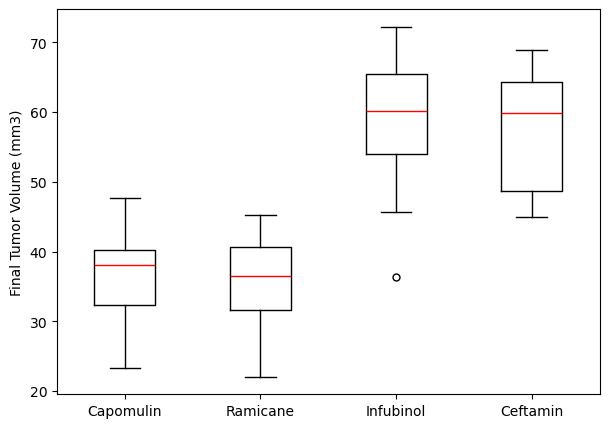

In [64]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
import matplotlib.pyplot as plt

# Convert tumor_vol_data to a DataFrame
tumor_vol_df = pd.DataFrame(tumor_vol_data, index=treatment_regimens).T

# Generate box plot using Pandas
boxplot = tumor_vol_df.plot(kind='box', color=dict(boxes='black', whiskers='black', medians='red', caps='black'), flierprops=flierprops, figsize=(7,5))

# Customize the flier properties to set the outliers color to red
flierprops = dict(marker='o', color='red', markersize=5)

# Set labels and title
plt.ylabel('Final Tumor Volume (mm3)')

# Display the plot
plt.show()

In [52]:
#displaying the columns to use correct indexes in the following codes
print(clean_combined_data.columns)

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')


## Line and Scatter Plots

In [53]:
# displaying all results for a specific mouse treated with "Capomulin'

# PS: there are codes to randomly chose a mouse, but they did not choose the one displayed in the assignment 
# that is why I used filter option to get information on the particular mouse (Mouse ID 'l509')
mouse_l509_data = clean_combined_data[clean_combined_data['Mouse ID'] == 'l509']

#sort and then filter the data
mouse_l509_data = mouse_l509_data.sort_values('Timepoint')
mouse_l509_data = mouse_l509_data[['Timepoint', 'Tumor Volume (mm3)', "Drug Regimen"]]

#print results for futher analysis of the study results
print(mouse_l509_data)

     Timepoint  Tumor Volume (mm3) Drug Regimen
371          0           45.000000    Capomulin
372          5           45.851193    Capomulin
373         10           46.759074    Capomulin
374         15           47.488599    Capomulin
375         20           48.070452    Capomulin
376         25           44.006257    Capomulin
377         30           44.708055    Capomulin
378         35           40.207288    Capomulin
379         40           40.770813    Capomulin
380         45           41.483008    Capomulin


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


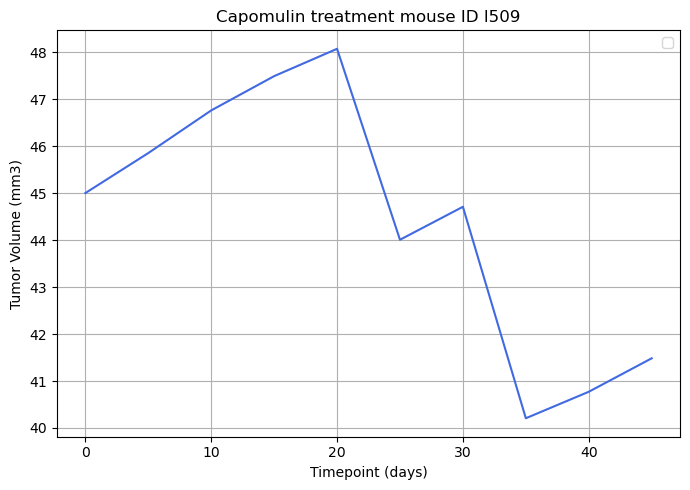

In [54]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Filter data for Mouse ID 'l509' and Drug Regimen 'Capomulin'
mouse_l509_data = clean_combined_data[(clean_combined_data['Mouse ID'] == 'l509') & 
                                      (clean_combined_data['Drug Regimen'] == 'Capomulin')]

# Sort values by 'Timepoint'
mouse_l509_data = mouse_l509_data.sort_values('Timepoint')

# Extracting data for the line plot
timepoints = mouse_l509_data['Timepoint']
tumor_volumes = mouse_l509_data['Tumor Volume (mm3)']

# Plot tumor volume vs. time point for the selected mouse
plt.figure(figsize=(7, 5))
plt.plot(timepoints, tumor_volumes, color='royalblue')
plt.title('Capomulin treatment mouse ID l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

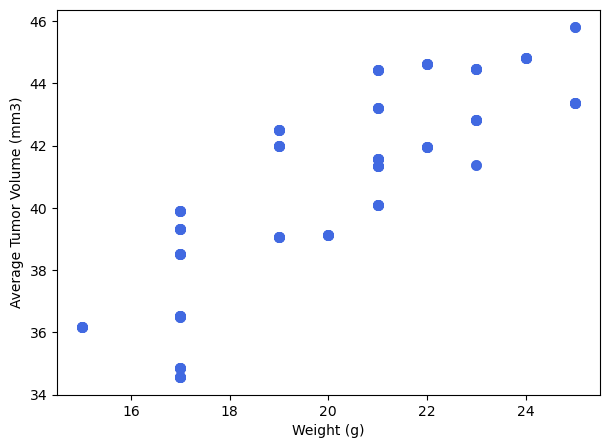

In [55]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter data for Capomulin regimen
capomulin_data = clean_combined_data[clean_combined_data['Drug Regimen'] == 'Capomulin']

# Group by 'Mouse ID' and calculate the average tumor volume
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Merge average tumor volume with mouse weight data
merged_data = pd.merge(avg_tumor_volume, capomulin_data[['Mouse ID', 'Weight (g)']], on='Mouse ID')

# Extract data for scatter plot
mouse_weight = merged_data['Weight (g)']
avg_tumor_volume = merged_data['Tumor Volume (mm3)']

# Plot scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(7, 5))
plt.scatter(mouse_weight, avg_tumor_volume, marker='o', facecolors='royalblue', s=45, alpha=0.75)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(False)

plt.show()


## Correlation and Regression

Correlation coefficient: 0.84
Slope: 0.9544396890241049
Intercept: 21.552160532685008
R-squared: 0.7088568047708723


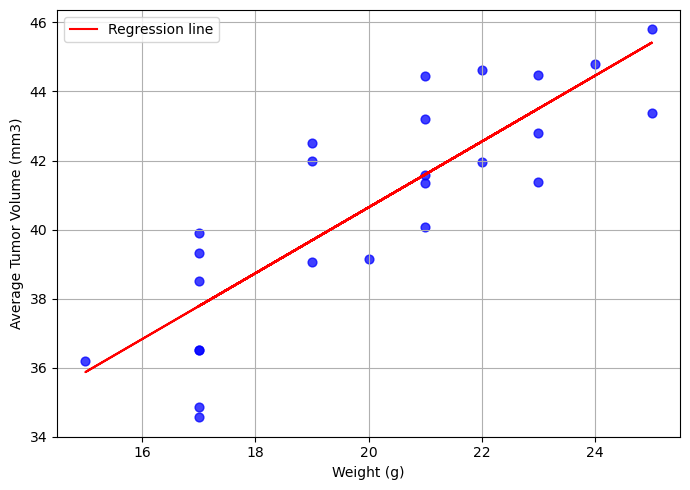

In [57]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#Import module to perform linear regreassion
from scipy.stats import linregress

#  We already created 'capomulin_data' variable in the earlier plot, filtering data for this treatment only

# Group by 'Mouse ID' and calculate the average tumor volume
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge average tumor volume with mouse weight data
merged_data_weight = pd.merge(avg_tumor_volume, capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates(), on='Mouse ID')

# Extract data for correlation and regression
mouse_weight = merged_data_weight['Weight (g)']
avg_tumor_volume = merged_data_weight['Tumor Volume (mm3)']

# Calculate and display the correlation coefficient with a format of 2 decimals
correlation = mouse_weight.corr(avg_tumor_volume)
print(f"Correlation coefficient: {correlation:.2f}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, avg_tumor_volume)

# Create scatter plot and regression line
plt.figure(figsize=(7, 5))
plt.scatter(mouse_weight, avg_tumor_volume, marker='o', facecolors='b', s=40, alpha=0.75)
plt.plot(mouse_weight, slope * mouse_weight + intercept, color='red', label='Regression line')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Print regression details
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")

#show plot
plt.show()